# Sentiment Analysis for regular text data
### Submitted by Sidhant Moza

In [92]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
df = pd.read_csv("/content/iron_man.csv")
df.head()

,character,line
0,TONY,"Oh, I get it. You guys aren’t allowed to talk. Is that it? Are you not allowed to talk?"
1,JIMMY,No. We’re allowed to talk.
2,TONY,Oh. I see. So it’s personal.
3,RAMIREZ,I think they’re intimidated.
4,TONY,"Good God, you’re a woman."


In [93]:
df.shape

(834, 2)

In [94]:
list(df['character'].value_counts().sort_index().index)

['ABU',
 'AGENT',
 'ATTENDANT',
 'BITCHING-BETTY',
 'CHRISTINE',
 'COULSON',
 'CRAMER',
 'DUBAI BEAUTY #1',
 'GABRIEL',
 'GENERAL GABRIEL',
 'HEAD ENGINEER',
 'HOGAN',
 'JARVIS',
 'JIMMY',
 'KHALID',
 'KID',
 'KID IN THE BACKSEAT',
 'MAJOR ALLEN',
 'MAN',
 'NARRATOR',
 'OBADIAH',
 'OFFICER',
 'PEPPER',
 'PRATT',
 'RAMIREZ',
 'RAZA',
 'REPORTER',
 'REPORTER # 1',
 'REPORTER #2',
 'REPORTER #3',
 'RHODEY',
 'SOLDIER',
 'TONY',
 'TV REPORTER’S VOICE',
 'TYCOON',
 'VIPER 1',
 'VIPER 2',
 'VOICE',
 'WOMAN',
 'WOMAN’S VOICE',
 'YINSEN']

In [95]:
df[df['character']=='VOICE']

,character,line
444,VOICE,Why not take it a step further?


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   character  834 non-null    object
 1   line       834 non-null    object
dtypes: object(2)
memory usage: 13.2+ KB


In [97]:
import re
def nwords(t):
    t = re.sub(r'[^a-zA-Z0-9‘’\s]','',t.lower())
    w = t.split()
    return w,len(w)

In [98]:
df['Words'], df['No. of Words'] = zip(*df['line'].apply(nwords))
df.head()

,character,line,Words,No. of Words
0,TONY,"Oh, I get it. You guys aren’t allowed to talk. Is that it? Are you not allowed to talk?","[oh, i, get, it, you, guys, aren’t, allowed, to, talk, is, that, it, are, you, not, allowed, to, talk]",19
1,JIMMY,No. We’re allowed to talk.,"[no, we’re, allowed, to, talk]",5
2,TONY,Oh. I see. So it’s personal.,"[oh, i, see, so, it’s, personal]",6
3,RAMIREZ,I think they’re intimidated.,"[i, think, they’re, intimidated]",4
4,TONY,"Good God, you’re a woman.","[good, god, you’re, a, woman]",5


In [99]:
spc = set(''.join(df['line'].str.findall(r'[^a-zA-Z0-9\s]').sum()))
print(spc)

{'”', '’', '.', ',', '“', '‘', '!', '?', '&', ':', '#', '-'}


In [100]:
pp = []
for s in df['line']:
    for w in s.lower().split():
        if "-" in w:
            #print(s)
            pp.append(w)
set(pp)

{'--',
 '--!',
 '--?',
 '--and',
 '--i',
 '--the',
 '--we’re',
 '--”',
 '1-2-5-0.',
 '119-64-5484',
 '13-7.',
 '1973--',
 '24-7.',
 '3--',
 'air-ground',
 'alive--',
 'and--',
 'appearance--?',
 'attacking--!',
 'be--',
 'big-big',
 'boom-kill',
 'boom-kill.',
 'bye-bye.',
 'calling--',
 'carbon-',
 'chute--',
 'cia--',
 'data-masked,',
 'de-',
 'design--',
 'division--',
 'double-dealing',
 'down--',
 'e-',
 'everything--',
 'f-22',
 'flight-stabilizer.',
 'full-time',
 'gift--',
 'go-to',
 'gold-',
 'gold-lettered',
 'green-on-green.',
 'ground-',
 'hang-',
 'heads-up.',
 'here--',
 'high-society',
 'high-tech',
 'hitler--',
 'hot-blooded,',
 'importantly--',
 'in-flight.',
 'inteli-',
 'inter-',
 'inter--',
 'is--',
 'it--',
 'judgement--',
 'know--',
 'let’s--',
 'life-support.',
 'long-lost',
 'm-',
 'm-category',
 'meltdown--',
 'minutes--',
 'modern-day',
 'newly-formed',
 'no-fly',
 'obadiah--',
 'over-priced--',
 'pepper--',
 'piece--',
 'power-to-weight',
 'pre-90s',
 'presen

In [101]:
import plotly.express as px
now = df.groupby('character')['No. of Words'].sum().sort_values(ascending=True)
fig = px.bar(now[-10:],orientation='h',title='Top 10 Most Speaking Characters')
fig.update_layout(xaxis_title='No. of Words Spoken',yaxis_title='Characters',showlegend=False,margin=dict(l=100, r=20, t=70, b=70))

In [104]:
import plotly.express as px
noc = df.groupby('character')['No. of Chars'].sum().sort_values(ascending=True)
fig = px.bar(noc[-10:],orientation='h',title='Top 10 Most Speaking Characters')
fig.update_layout(xaxis_title='No. of Characters Spoken',yaxis_title='Characters',showlegend=False,margin=dict(l=100, r=20, t=70, b=70))

In [102]:
df['No. of Chars'] = df['Words'].apply(lambda x: sum(len(word) for word in x))
df.head()

,character,line,Words,No. of Words,No. of Chars
0,TONY,"Oh, I get it. You guys aren’t allowed to talk. Is that it? Are you not allowed to talk?","[oh, i, get, it, you, guys, aren’t, allowed, to, talk, is, that, it, are, you, not, allowed, to, talk]",19,64
1,JIMMY,No. We’re allowed to talk.,"[no, we’re, allowed, to, talk]",5,20
2,TONY,Oh. I see. So it’s personal.,"[oh, i, see, so, it’s, personal]",6,20
3,RAMIREZ,I think they’re intimidated.,"[i, think, they’re, intimidated]",4,24
4,TONY,"Good God, you’re a woman.","[good, god, you’re, a, woman]",5,19


In [103]:
print(f"Total No. of Words = {df['No. of Words'].sum()}")
print(f"Total No. of Characters = {df['No. of Chars'].sum()}")

Total No. of Words = 9253
Total No. of Characters = 39050


In [105]:
fig = px.pie(now,names=now.index,values=now.values,title='Proportion of Words Spoken by Characters',height=500,width=700)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(margin=dict(l=10, r=10, t=50, b=10))
fig.show()

In [106]:
fig =px.pie(noc,names=noc.index,values=noc.values,title='Proportion of Characters spoken by Characters',height=500,width=700)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(margin=dict(l=10, r=10, t=50, b=10))
fig.show()

1829 Words


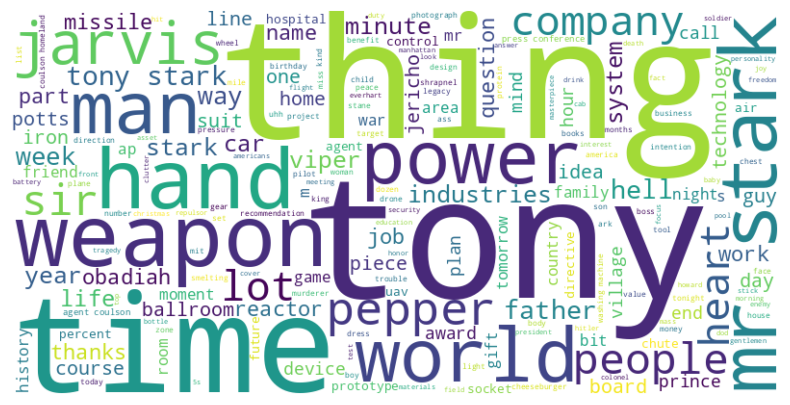

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy as sp
nlp = sp.load("en_core_web_sm")
nw = []
for s in df['Words']:
    m = ' '.join(s)
    nw.extend([token.text for token in nlp(m) if token.pos_ in ['PROPN','NOUN']])
print(len(nw),"Words")
at = ' '.join(nw)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(at)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [108]:
!python -m nltk.downloader vader_lexicon

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [109]:
from nltk.sentiment import SentimentIntensityAnalyzer as sia
import numpy as np
sen = []
pol = ['-ve','Neu','+ve']
for s in df['line']:
    ps = list(sia().polarity_scores(s).values())[:3]
    sen.append(pol[np.argmax(np.array(ps))])
    #if ps[0]>0.5:
    #    sen.append('-ve')
    #elif ps[2]>0.5:
    #    sen.append('+ve')
    #else:
    #    sen.append('Neu')
df['Sentiment'] = sen
df.head()

,character,line,Words,No. of Words,No. of Chars,Sentiment
0,TONY,"Oh, I get it. You guys aren’t allowed to talk. Is that it? Are you not allowed to talk?","[oh, i, get, it, you, guys, aren’t, allowed, to, talk, is, that, it, are, you, not, allowed, to, talk]",19,64,Neu
1,JIMMY,No. We’re allowed to talk.,"[no, we’re, allowed, to, talk]",5,20,Neu
2,TONY,Oh. I see. So it’s personal.,"[oh, i, see, so, it’s, personal]",6,20,Neu
3,RAMIREZ,I think they’re intimidated.,"[i, think, they’re, intimidated]",4,24,-ve
4,TONY,"Good God, you’re a woman.","[good, god, you’re, a, woman]",5,19,+ve


In [110]:
df['Sentiment'].value_counts()

Neu    758
+ve     45
-ve     31
Name: Sentiment, dtype: int64

In [111]:
list(sia().polarity_scores("He doesn’t seem happy.").values())

[0.0, 0.448, 0.552, 0.5719]

In [112]:
df[df['Sentiment']=='+ve']

,character,line,Words,No. of Words,No. of Chars,Sentiment
4,TONY,"Good God, you’re a woman.","[good, god, you’re, a, woman]",5,19,+ve
7,TONY,Please.,[please],1,6,+ve
11,TONY,Join the club.,"[join, the, club]",3,11,+ve
101,PEPPER,"Yep. Funny, same day as last year.","[yep, funny, same, day, as, last, year]",7,25,+ve
106,TONY,"You’re welcome, Miss Potts.","[you’re, welcome, miss, potts]",4,22,+ve
110,TONY,"Thanks, maybe later.","[thanks, maybe, later]",3,16,+ve
130,RHODEY,That’s funny.,"[that’s, funny]",2,11,+ve
141,OBADIAH,Sounds good.,"[sounds, good]",2,10,+ve
158,ABU,"Welcome Tony Stark, the greatest mass murderer in the history of America. It’s a great honor.","[welcome, tony, stark, the, greatest, mass, murderer, in, the, history, of, america, it’s, a, great, honor]",16,75,+ve
164,YINSEN,"Perfect. You did very well, Stark.","[perfect, you, did, very, well, stark]",6,26,+ve


In [113]:
import plotly.graph_objects as go
topp = df[df['Sentiment'] == '+ve']['character'].value_counts().nlargest(10)
topn = df[df['Sentiment'] == '-ve']['character'].value_counts().nlargest(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=topp.values, y=topp.index, orientation='h', name='+ve'))
fig.add_trace(go.Bar(x=topn.values, y=topn.index, orientation='h', name='-ve'))
fig.update_layout(
    title='Top Characters with Most Lines by Sentiment',
    barmode='group',
    yaxis=dict(title='Character'),
    xaxis=dict(title='Number of Lines'),
    height=600
)
fig.show()

In [145]:
pd.set_option('display.max_colwidth', None)
df[df['character']=='TONY'][['line','Sentiment']]

,line,Sentiment
0,"Oh, I get it. You guys aren’t allowed to talk. Is that it? Are you not allowed to talk?",Neu
2,Oh. I see. So it’s personal.,Neu
4,"Good God, you’re a woman.",+ve
5,"I, honestly, I couldn’t have called that. I would apologize, but isn’t that what we’re going for here? I saw you as a soldier first.",Neu
7,Please.,+ve
...,...,...
824,You know...that night at the concert hall. Do you ever think about it?,Neu
827,That will be all Miss Potts.,Neu
829,I’ve seen the papers. I’ve heard the reports. That’s why I want to put an end to all this wild speculation. The truth is--,Neu
830,I am Iron Man.,Neu


In [115]:
from textblob import TextBlob
snt = TextBlob("I am going to disintegrate you!").sentiment
snt.polarity

0.0

In [116]:
sia().polarity_scores("I am going to disintegrate you!")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [117]:
df.head()

,character,line,Words,No. of Words,No. of Chars,Sentiment
0,TONY,"Oh, I get it. You guys aren’t allowed to talk. Is that it? Are you not allowed to talk?","[oh, i, get, it, you, guys, aren’t, allowed, to, talk, is, that, it, are, you, not, allowed, to, talk]",19,64,Neu
1,JIMMY,No. We’re allowed to talk.,"[no, we’re, allowed, to, talk]",5,20,Neu
2,TONY,Oh. I see. So it’s personal.,"[oh, i, see, so, it’s, personal]",6,20,Neu
3,RAMIREZ,I think they’re intimidated.,"[i, think, they’re, intimidated]",4,24,-ve
4,TONY,"Good God, you’re a woman.","[good, god, you’re, a, woman]",5,19,+ve


In [118]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [119]:
x.drop(columns=['character','Words'],inplace=True)

In [127]:
from sklearn import preprocessing

# label_encoder object knows unique encoding for each unique element.
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y= label_encoder.fit_transform(y)
x['line']=label_encoder.fit_transform(x['line'])

In [128]:
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in y_train:", y_train.shape[0])

Number of samples in X_train: 667
Number of samples in y_train: 667


In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [135]:
# Training sentiment analysis model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC()

In [136]:
y_pred = svm_classifier.predict(X_test)

In [146]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("F1 Score :", f1)

Accuracy : 0.8982035928143712
Precision : 0.8067696941446448
Recall : 0.8982035928143712
F1 Score : 0.8500349458811084


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

